# **Experiment 2: Sequence Text Prediction using LSTM**

<br>**Objective:To generate next characters/words based on a given input sequence using LSTM.**<br>

**Dataset: Shakespeare’s Text (TensorFlow Datasets)**

**Step 1: Install Required Libraries**

In [ ]:
!pip install tensorflow

**Step 2: Load Dataset**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Load dataset without supervised mode
data, info = tfds.load("tiny_shakespeare", with_info=True)

# Read the full text
text_data = ""
for example in data['train']:
    text_data += example["text"].numpy().decode("utf-8")

print(f"Total characters in dataset: {len(text_data)}")
print(f"Sample text:\n{text_data[:500]}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.Q41VYS_1.0.0/tiny_shakespeare-train.tfrecord*.…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.Q41VYS_1.0.0/tiny_shakespeare-validation.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.Q41VYS_1.0.0/tiny_shakespeare-test.tfrecord*..…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.
Total characters in dataset: 1003854
Sample text:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


**Step 3: Text Preprocessing**

In [ ]:
# Create character-level vocabulary
vocab = sorted(set(text_data))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Vectorize text
text_as_int = np.array([char2idx[c] for c in text_data])

# Set sequence length
seq_length = 100
examples_per_epoch = len(text_data)//seq_length

# Create training sequences
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


**Step 4: Create Batches**

In [ ]:
# Batch size and buffer for shuffling
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


**Step 5: Build the LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

vocab_size = len(vocab)  # vocab_size should be the length of your vocabulary
embedding_dim = 256  # you can adjust this value as needed
rnn_units = 1024

model = Sequential([
    Input(shape=(None,)),  # Input shape defined here
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True),
    Dense(vocab_size)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 256)      │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 1024)     │     5,246,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 65)       │        66,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,330,241 (20.33 MB)

 Trainable params: 5,330,241 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Define Loss and Compile**

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)


** Step 7: Train the Model**

In [ ]:
history = model.fit(dataset, epochs=10)
model.save_weights("shakespeare_model.weights.h5")  # ✅ Save weights after training


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 3.2002
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 2.0928
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 1.7927
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 1.6213
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - loss: 1.5151
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 1.4447
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - loss: 1.3908
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 1.3502
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 1.3131
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 1.2799


**Step 8: Plot Training Loss**

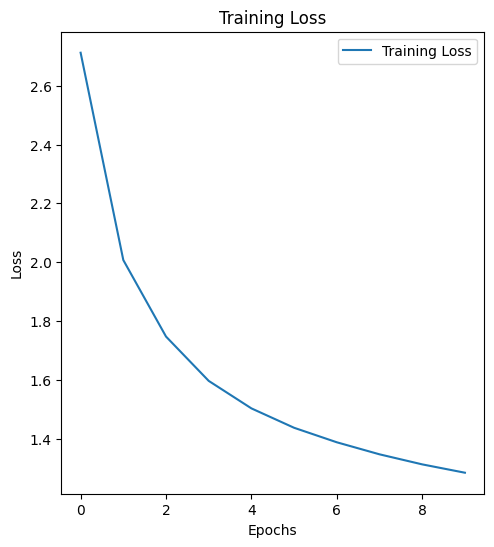

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


**Step 9: Text Generation Function**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
import tensorflow as tf

# Build model with Input() layer that defines batch_input_shape
model = Sequential([
    Input(batch_shape=(1, None)),  # Define input shape here!
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
    Dense(vocab_size)
])

# Load weights before text generation
model.load_weights("shakespeare_model.weights.h5")  # Use saved weights

# Model is already built with Input layer
# Now you can generate text

def generate_text(model, start_string):
    num_generate = 500
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 0.5

    # Reset the states of the LSTM layer
    model.layers[1].reset_states()  # Reset states of LSTM layer (index 1)

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Run the generation
print(generate_text(model, start_string="To be or not to be, "))


To be or not to be, shall not the talk,
And we shall do before the prince of see,
To make the state that hath show'd the thing
That lie hath but forth rebused in the work,
I am desperation, when thou art not heard,
Who is a shame, that which I have been cause
The prince like the sentence of the duke.

LEONTES:
They speak the duke of thy death?

Page:
My lord, I see the charge must be seen.

LADY ANNE:
What is the daughter as we great would be not so.

MENENIUS:
What, sir, we shall be revenged this cold,
Did have an


In [ ]:
print(generate_text(model, start_string="Once upon a time, "))


Once upon a time, the crown the second shame to death.

KING EDWARD IV:
Now, my lord.

KING RICHARD II:
What should I do tell the time that we do not see.

KING RICHARD III:
Why, sir, let's be wrong.

CLARENCE:
What is the better who let him like a way,
And please your father was revenged him.

CLIFFORD:
Here is the court? What is the commons? make the king,
Is dead is dead to the father of the new down.

KING RICHARD II:
Why, he, my lord, then lessed blood is done,
Common me to the poor boys, that cannot be?

CL


In [ ]:
print(generate_text(model, start_string="In the heart of the jungle, "))


In the heart of the jungle, strike the like
To him and say of her father and with the earth.

PAULINA:
What is the destery? Is the man of the which
From man that came the earth as state should
In child, who shall I be arms me contents
The shame of the city for that the death
To say the crown and love a sister, that
Which is not that our hearts I should slay
What is not think that fair suffer'd arms.

DUKE VINCENTIO:
What may be married, the duke of the mother?

KING EDWARD IV:
Why shall be should the store that I do be con


In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step

📄 Classification Report:

              precision    recall  f1-score   support

           0     0.8381    0.8786    0.8579     12500
           1     0.8724    0.8303    0.8508     12500

    accuracy                         0.8544     25000
   macro avg     0.8553    0.8544    0.8544     25000
weighted avg     0.8553    0.8544    0.8544     25000



**Step 9: Confusion Matrix Visualization**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


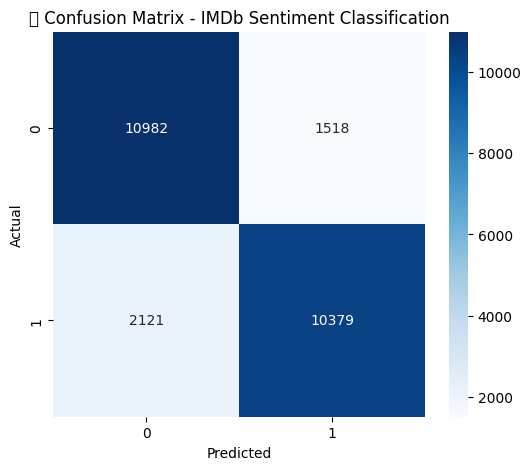

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IMDb Sentiment Classification")
plt.show()